# <center> 👉 class_09_4 » _Keypoints Detection - GFTTDetector, FAST, Find Circles w/SimpleBlobDetector, Color Detection_ </center>  


## ▣ Keypoints Detection  

There are a variety of algorithms for feature detection.   
In addition, each feature point has a variety of information other than coordinates (x, y).   
The return as a function of the Harris Corner detection and the Sea-Tomaš detection shown above were just coordinates of feature points.   
However, the return results of the following feature detectors return __not only the coordinates of the feature points, but also a variety of information.__  

OpenCV provides the following feature detection functions: (You can assign each feature detector function to the detector.)  

특징점 검출을 위한 알고리즘은 다양합니다. 또한 각각의 특징점도 좌표(x, y) 이외에 다양한 정보를 가집니다.   
위에서 살펴봤던 해리스 코너 검출과 시-토마시 검출의 함수 반환 결과는 단지 특징점의 좌표였습니다.   
하지만 다음 특징점 검출기들의 반환 결과는 특징점의 좌표뿐만 아니라 다양한 정보들도 함께 반환합니다. 

~ Syntax:  
    
> **keypoints = (select detector).detect(img, mask):**   

~ Parametes:    
* mask(optional): Exclusion Mask, None, 검출 제외 마스크
* keypoints: KeyPoint list
* **Keypoint:** 
>* pt: Feature Point Coordinates(x, y), float type
>* size: Feature Radius of neighbors
>* angle: clockwise, -1 = none
>* response: Reaction Intensity 
>* octave: Pyramid level
>* class_id: ID

OpenCV provides a function dedicated to displaying feature points, as shown below.  

**outImg = cv2.drawKeypoints(img, keypoints, outImg, color, flags)**

* flags(optional):   
>- cv2.DRAW_MATCHES_FLAGS_DEFAULT: Drawing only a circle in the center of coordinates (default),   
>- cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS: Reflects the size and angle of the circle

## ▶ GFTTDetector  

GFTTDetector is a feature detector implemented with the __cv2.goodFeaturesToTrack(__) function shown earlier.   

~ Syntax: 
    
>- **detector = cv2.GFTTDetector_create(img, maxCorners, qualityLevel, minDistance, corners, mask, blockSize, useHarrisDetector, k)**

~ Parametes:  
    
- All parameters are the same as cv2.goodFeaturesToTrack()   
- The results detected by this detector are only feature point coordinate (pt) properties, and all other attribute values are blank.

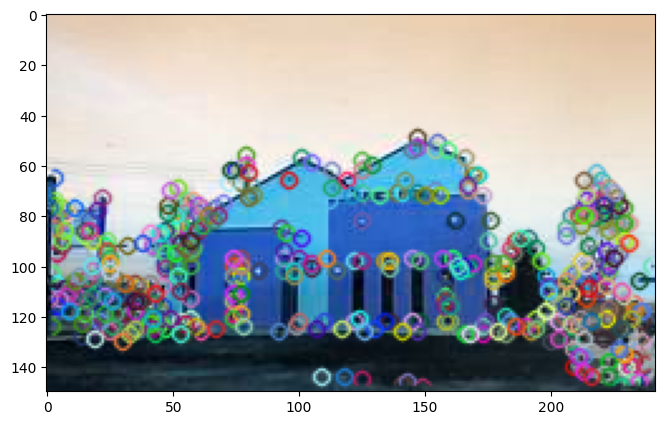

In [2]:
# GFTTDetector (kpt_gftt.py)

import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 5), dpi=100)

img = cv2.imread("./images/cnr_det_ex.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gftt = cv2.GFTTDetector_create() 
keypoints = gftt.detect(gray, None)
img_draw = cv2.drawKeypoints(img, keypoints, None)

# cv2.imshow('GFTTDectector', img_draw)
# cv2.waitKey(0)
# cv2.destrolyAllWindows()
plt.imshow(img_draw)
plt.show()

## ▶ FAST(Feature from Accelerated Segment Test)  

- The FAST algorithm is a feature detector algorithm proposed by Rosten and Drummond that compares pixel P with a set of pixels on a small circle around the pixel.  
- Apply a threshold to the pixels around pixel P and classify them as dark, light, and similar pixels, so that the pixels on the circle must be continuously dark or light, and this continuity should be at least half.  
- If this condition is satisfied, the pixel can be considered a superior feature.    

        - FAST 알고리즘은 Rosten과 Drummond가 제안한 피처 검출기 알고리즘으로서 픽셀 P와 픽셀 주변의 작은 원 위에 있는 픽셀의 집합을 비교하는 방식입니다.  
        - 픽셀 P의 주변 픽셀에 임곗값을 적용해 어두운 픽셀, 밝은 픽셀, 유사한 픽셀로 분류해 원 위의 픽셀이 연속적으로 어둡거나 밝아야 하며 이 연속성이 절반 이상이 돼야 합니다.  
        - 이 조건을 만족하는 경우 해당 픽셀은 우수한 특징점으로 볼 수 있다는 개념입니다.
        
~ Syntax:  
    
> **detector = cv2.FastFeatureDetector_create(threshold, nonmaxSuppression, type)**

~ Parametes:

* threshold(optional): Corner Judgment Threshold 코너 판단 임계 값 (default=10)  
* nonmaxSuppression(optional): Suppression of corners, not maximum scores 최대 점수가 아닌 코너 억제 (default=True)  
* type(optional):   
>- cv2.FastFeatureDetector_TYPE_9_16: 9 out of 16 consecutive 16개 중 9개 연속(default),   
>- cv2.FastFeatureDetector_TYPE_7_12: 7 out of 12 consecutive 12개 중 7개 연속,   
>- cv2.FastFeatureDetector_TYPE_5_8 : 5 out of 8 consecutive 8개 중 5개 연속

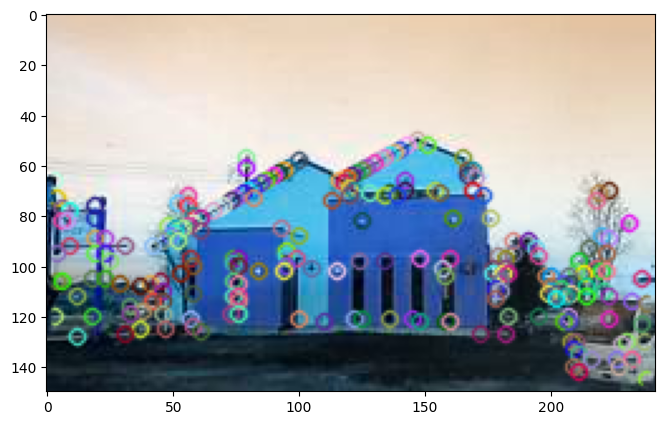

In [3]:
# FAST (kpt_fast.py)

import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 5), dpi=100)

img = cv2.imread("./images/cnr_det_ex.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

fast = cv2.FastFeatureDetector_create(50)
keypoints = fast.detect(gray, None)
img = cv2.drawKeypoints(img, keypoints, None)
# cv2.imshow('FAST', img)
# cv2.waitKey()
# cv2.destroyAllWindows()
plt.imshow(img)
plt.show()

## ▶ Find Circles  

To identify circles, ellipses, or in general, any shape in which the pixels are connected we use the **SimpleBlobDetector()** function of OpenCV.  
In non-technical terms, a blob is understood as a thick liquid drop.   
Here, we are going to call all shapes a blob.  
Our task is to detect and recognize whether the blob is a circle or not.

> ### ● SimpleBlobDetector  
> 
> A binary large object (BLOB) is a group of pixels connected in a binary scale.  
> SimpleBlobDetector is a detector that considers small objects as noise and only looks for large objects over a certain size.  
> 
> ~ SimpleBlobDetector Syntax:  
> 
> >**detector = cv2.SimpleBlobDetector_create([parameters]):** 
> 
> ~ Parametes:
> 
> * minThreshold, maxThreshold, thresholdStep: threshold value
> >- In minThreshold, increment by thresholdStep until maxThreshold is not exceeded  
> * minRepeatability
> * minDistBetweenBlobs
> * filterByArea
> * minArea, maxArea
> * filterByCircularity
> * minCircularity, maxCircularity
> * filterByColor
> * blobColor: 0 = black BLOB , 255 = white BLOB 
> * filterByConvexity
> * minConvexity, maxConvexity
> * filterByInertia
> * minInertiaRatio, maxInertiaRatio

OpenCV provides a convenient way to detect blobs and filter them based on different characteristics.   
There are various different parameters that control the identification process and the results.  
The important parameters used for this project are:   

* **Filter by Area** – This is to avoid any identification of any small dots present in the image that can be wrongly detected as a circle. 

<img src ='./images/simple_blob-2.jpg' width=400 height=200>

* **Filter by Circularity** – This helps us to identify, shapes that are more similar to a circle. 

> Circularity = $4*pi*Area/(perimeter)^2$

> A true circle has a circularity of 1, a square has a circularity near 78%.   

<img src ='./images/simple_blob-5.jpg' width=400 height=200>

* **Filter by Convexity** – Concavity in general, destroys the circularity. More is the convexity, the closer it is to a close circle. 

<img src ='./images/simple_blob-4.jpg' width=400 height=200>


* **Filter by Inertia** – Objects similar to a circle has larger inertial.  
> * E.g. for a circle, this value is 1, for an ellipse it is between 0 and 1, and for a line it is 0.   
> * To filter by inertia ratio, set filterByInertia = 1, and set, 0 <= minInertiaRatio <= 1 and maxInertiaRatio (<=1 ) appropriately. 

<img src ='./images/simple_blob-3.jpg' width=400 height=200>

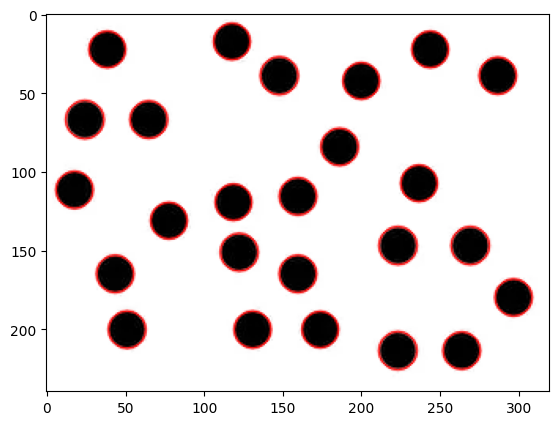

In [11]:
# identifying Circles
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 5), dpi=100)

image = cv2.imread('./images/Circular-Blobs.jpg', 1)
  
# Set filtering parameters 
params = cv2.SimpleBlobDetector_Params()  # Initialize parameter setting using cv2.SimpleBlobDetector

params.filterByArea = True               # Set Area filtering parameters
params.minArea = 100

params.filterByCircularity = True       # Set Circularity filtering parameters
params.minCircularity = 0.9

params.filterByConvexity = True          # Set Convexity filtering parameters
params.minConvexity = 0.2

params.filterByInertia = True            # Set inertia filtering parameters
params.minInertiaRatio = 0.01

detector = cv2.SimpleBlobDetector_create(params)  # Create a detector with the parameters
keypoints = detector.detect(image)       # Detect blobs
  

blank = np.zeros((1, 1))                
blobs = cv2.drawKeypoints(image, keypoints, blank, (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)   # Draw blobs on our image as red circles
  
number_of_blobs = len(keypoints)
text = "Number of Circular Blobs: " + str(len(keypoints))
cv2.putText(blobs, text, (20, 550), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 100, 255), 2)
  
cv2.imshow("Filtering Circular Blobs Only", blobs)
cv2.waitKey(0)
cv2.destroyAllWindows()


plt.imshow(cv2.cvtColor(blobs, cv2.COLOR_BGR2RGB))
plt.show()

## ▶ Color Detection

In [15]:
import numpy as np
import cv2
import pandas as pd
from matplotlib import pyplot as plt


index=["color","color_name","hex","R","G","B"] # Reading csv file with pandas and giving names to each column
csv = pd.read_csv('./colors.csv', names=index, header=None)  # The colors.csv file includes 865 color names along with their RGB and hex values.
len(csv)

865

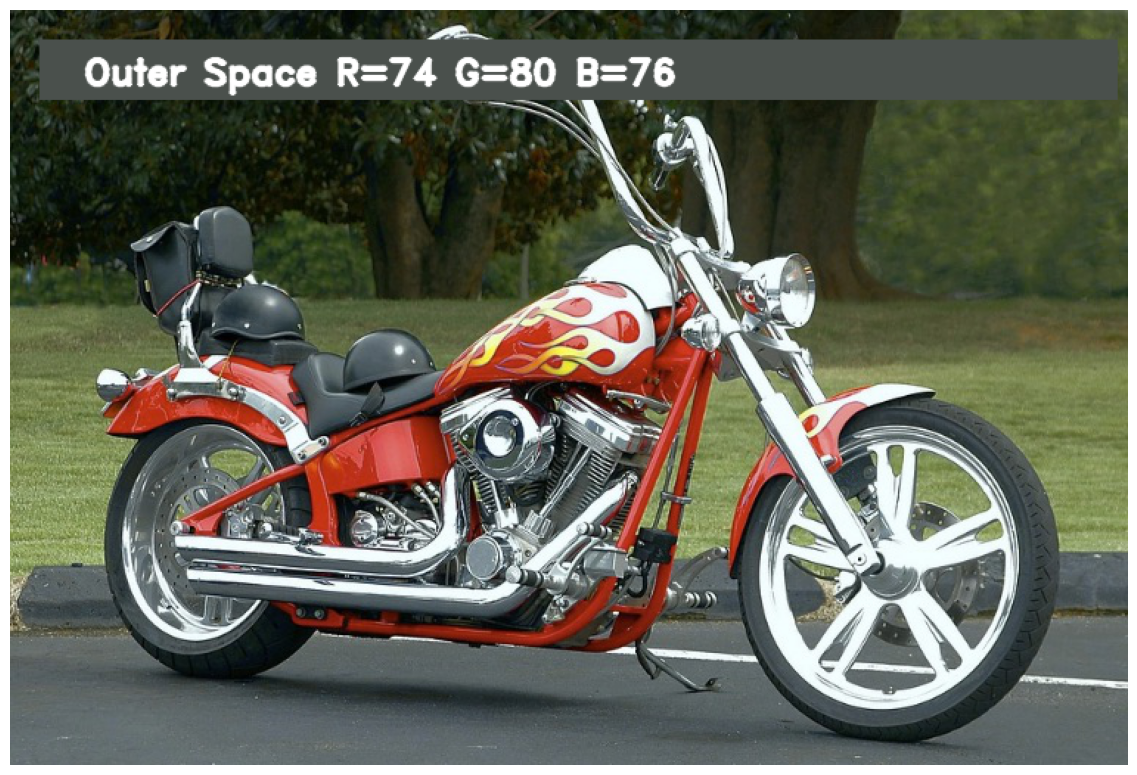

In [17]:
def draw_function(event, x,y,flags,param):  # Left BUTTON DBL CLK
    if event == cv2.EVENT_LBUTTONDBLCLK:
        global b,g,r,xpos,ypos, clicked
        clicked = True
        xpos = x
        ypos = y
        b,g,r = img[y,x]
        b = int(b)
        g = int(g)
        r = int(r)
'''
We have the r,g and b values. Now, we need another function which will return us the color name from RGB values.
To get the color name, we calculate a distance(d) which tells us how close we are to color and choose the one having minimum distance.
Our distance is calculated by this formula:
d = abs(Red – ithRedColor) + (Green – ithGreenColor) + (Blue – ithBlueColor)
'''
def getColorName(R,G,B):
    minimum = 10000
    for i in range(len(csv)):
        d = abs(R- int(csv.loc[i,"R"])) + abs(G- int(csv.loc[i,"G"]))+ abs(B- int(csv.loc[i,"B"]))
        if(d<=minimum):
            minimum = d
            cname = csv.loc[i,"color_name"]
    return cname        

img = cv2.imread('./images/practice_img/motorcycle.jpg')  # motorcycle.jpg  pencil_small.jpg
clicked = False
r = g = b = xpos = ypos = 0

cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_function)

while(1):
    cv2.imshow("image",img)
    if (clicked):
        cv2.rectangle(img,(20,20), (750,60), (b,g,r), -1) # (image, startpoint, endpoint, color, thickness) -1 thickness fills rectangle
        text = getColorName(r,g,b) + ' R='+ str(r) + ' G='+ str(g) + ' B='+ str(b)   # text (Color name and RGB values)
        cv2.putText(img, text,(50,50),2,0.8,(255,255,255),2,cv2.LINE_AA)    # put text (Color name and RGB values)
        if(r+g+b>=600):
            cv2.putText(img, text,(50,50),2,0.8,(0,0,0),2,cv2.LINE_AA)   # For very light colours we will display text in black colour
        clicked=False

    if cv2.waitKey(20) & 0xFF ==27:
        break
        
cv2.destroyAllWindows()

from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=100)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()